In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

In [33]:
df = pd.read_csv("../data/backtest_results/monthly_performance.csv")
print(df)

    Unnamed: 0        Date  Starting Capital  portfolio_value  return_pct  \
0            0  2024-01-31       1000.000000      1068.036560    0.068037   
1            1  2024-02-29       1068.036560      1108.415796    0.037807   
2            2  2024-03-31       1108.415796      1090.452079   99.983793   
3            3  2024-04-30       1090.452079      1088.789643   99.998475   
4            4  2024-05-31       1088.789643      1104.211200    0.014164   
5            5  2024-06-30       1104.211200      1108.973045    0.004312   
6            6  2024-07-31       1108.973045      1067.063265   99.962208   
7            7  2024-08-31       1067.063265      1101.744888    0.032502   
8            8  2024-09-30       1101.744888      1090.649433   99.989929   
9            9  2024-10-31       1090.649433      1096.186787    0.005077   
10          10  2024-11-30       1096.186787      1154.826582    0.053494   
11          11  2024-12-31       1154.826582      1147.027935   99.993247   

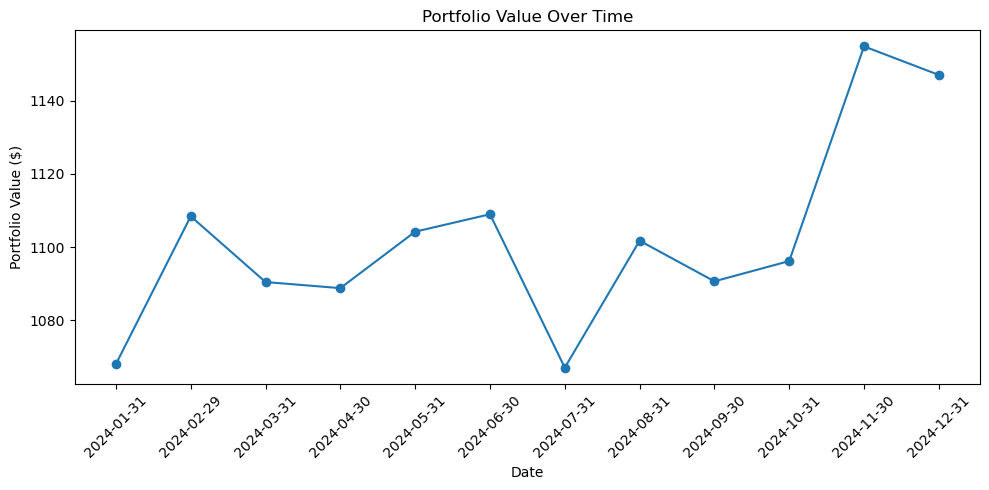

In [34]:
plt.figure(figsize=(10, 5))
plt.plot(df["Date"], df["portfolio_value"], marker='o')
plt.title("Portfolio Value Over Time")
plt.xlabel("Date")
plt.ylabel("Portfolio Value ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("../visuals/portfolio_value_over_time.jpg", format="jpg")
plt.show()

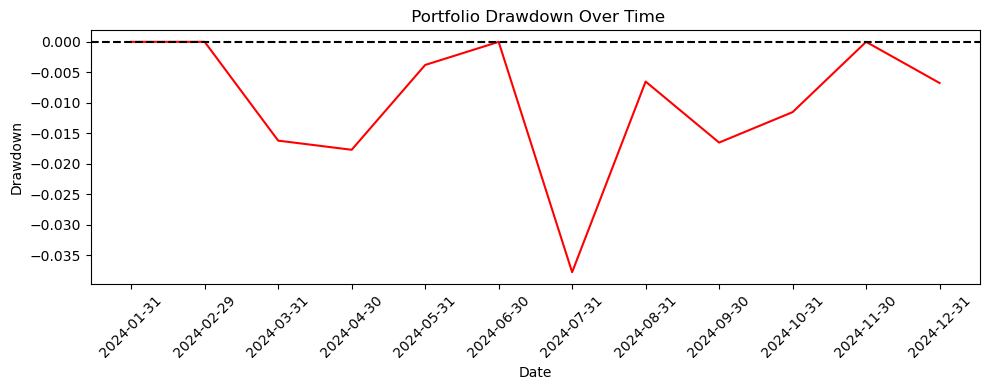

In [35]:
df["cum_max"] = df["portfolio_value"].cummax()
df["drawdown"] = df["portfolio_value"] / df["cum_max"] - 1
plt.figure(figsize=(10, 4))
plt.plot(df["Date"], df["drawdown"], color='red')
plt.title(" Portfolio Drawdown Over Time")
plt.xlabel("Date")
plt.ylabel("Drawdown")
plt.xticks(rotation=45)
plt.axhline(0, color='black', linestyle='--')
plt.tight_layout()
plt.savefig("../visuals/portfolio_dropdown_over_time.jpg", format="jpg")
plt.show()

C:\Users\ABJ35241\AppData\Local\Temp\ipykernel_52952\4181365402.py:14: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
C:\Users\ABJ35241\AppData\Local\Temp\ipykernel_52952\4181365402.py:15: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.savefig("../visuals/long_and_short_counts.jpg", format="jpg")
c:\Users\ABJ35241\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


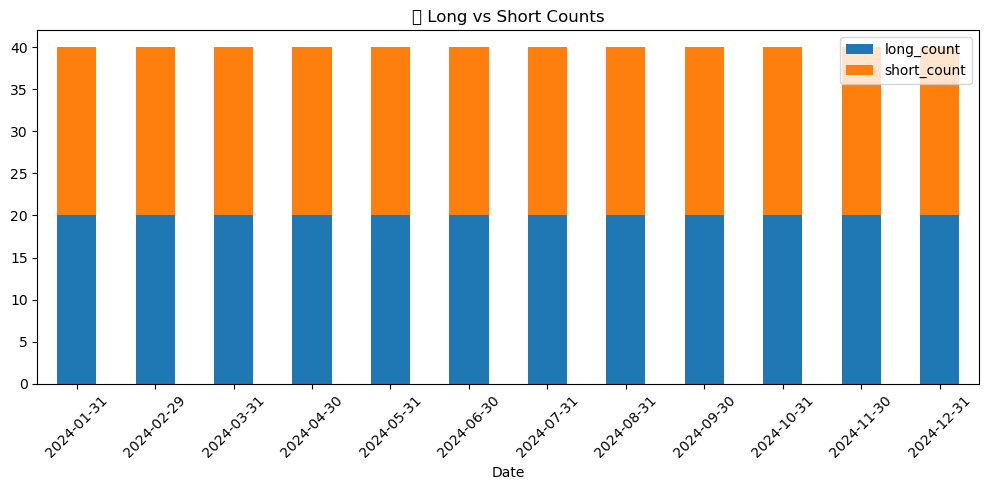

In [36]:
df["long_tickers"] = df["long_tickers"].apply(ast.literal_eval)
df["short_tickers"] = df["short_tickers"].apply(ast.literal_eval)

# Compute counts
df["long_count"] = df["long_tickers"].apply(len)
df["short_count"] = df["short_tickers"].apply(len)

# Plotting long vs short count
df[["Date", "long_count", "short_count"]].plot(
    x="Date", kind="bar", stacked=True, figsize=(10, 5)
)
plt.title("📊 Long vs Short Counts")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("../visuals/long_and_short_counts.jpg", format="jpg")
plt.show()

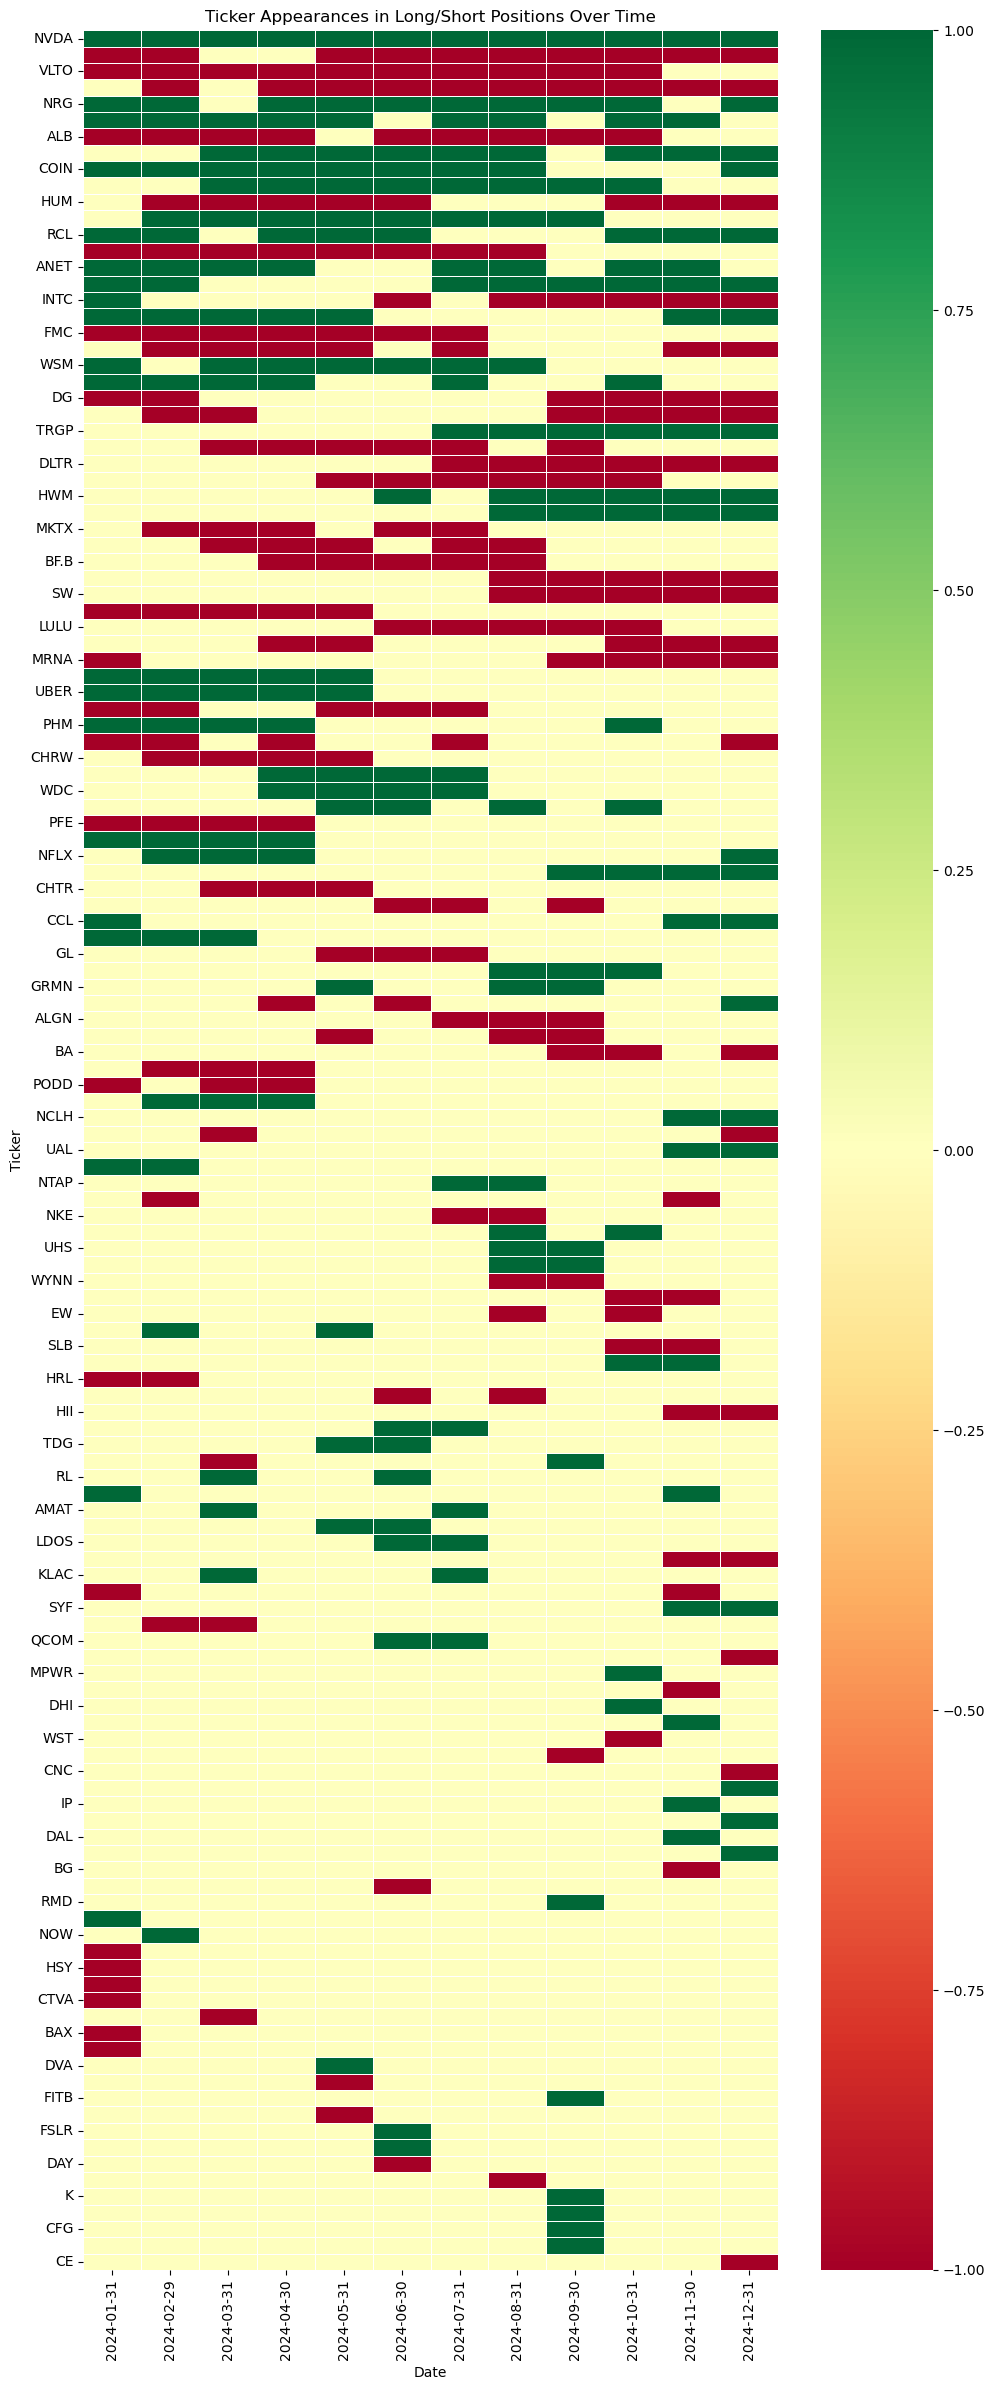

In [37]:
heatmap_df = pd.DataFrame()

for index,row in df.iterrows():
    date=row["Date"]
    for ticker in row["long_tickers"]:
        heatmap_df.loc[ticker,date]=1
    for ticker in row["short_tickers"]:
        heatmap_df.loc[ticker,date]= -1


heatmap_df.fillna(0,inplace=True)

heatmap_df["total_appearance"] = (heatmap_df!=0).sum(axis=1)
heatmap_df = heatmap_df.sort_values("total_appearance",ascending=False)
heatmap_df.drop(columns=["total_appearance"], inplace=True)
    
plt.figure(figsize=(10,len(heatmap_df)//5.5))
sns.heatmap(heatmap_df,cmap="RdYlGn",cbar=True, center=0, linewidths=0.5)
plt.title("Ticker Appearances in Long/Short Positions Over Time")
plt.xlabel("Date")
plt.ylabel("Ticker")
plt.tight_layout()
plt.savefig("../visuals/ticker_appearance_over_time.jpg", format="jpg")
plt.show()